In [200]:
# Importing required libraries
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth

# Load your dataset (assuming it's in CSV format)
dataset = pd.read_csv('1-Trendanalysis.csv')

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(dataset)

# Generate frequent item sets using FP-Growth
frequent_itemsets = fpgrowth(one_hot_encoded, min_support=0.05, use_colnames=True)

# Sort frequent item sets by support
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Print the top frequent item sets
print("Top Frequent Item Sets:")
print(sorted_frequent_itemsets.head())

# Find low selling products
product_frequency = one_hot_encoded.sum(axis=0).sort_values()
low_selling_products = product_frequency[product_frequency < 50]  # Adjust threshold as needed

# Print low selling products
print("\nLow Selling Products:")
print(low_selling_products)


C:\Users\aravind ad\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top Frequent Item Sets:
    support                            itemsets
3  0.253036     (Customer_Category_Young Adult)
0  0.249733     (Customer_Category_Middle-Aged)
1  0.244596  (Customer_Category_Senior Citizen)
2  0.126668       (Customer_Category_Homemaker)
4  0.125967        (Customer_Category_Teenager)

Low Selling Products:
Product_['Milk', 'Milk', Salt, 'Soap', 'Wheat Rava']                    1
Product_['Potatoes', 'Plant Fertilizer', 'Toilet Freshner']             1
Product_['Potatoes', 'Pickles', 'Onions', 'Ice Cream', 'Dustpan']       1
Product_['Potatoes', 'Pickles', 'Milk', 'Shaving Cream', 'Mustard']     1
Product_['Potatoes', 'Pickles', 'Ketchup']                              1
                                                                       ..
Product_['Milk', 'Ice Cream']                                          10
Product_['Deodorant', 'Vinegar']                                       10
Product_[ 'Ice Cream']                                                 16

# INSTALLING APYORI LIBRARY

In [201]:
pip install apyori

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# IMPORTING LIBRARY

In [202]:
from apyori import apriori
import pandas as pd

# READING THE DATASET

In [203]:
data = pd.read_csv('1-Trendanalysis.csv')

# Convert the 'Items' column into a list of item

In [204]:
data['Product'] = data['Product'].apply(lambda x: [item.strip() for item in x.split(',')])

# DISPLAYING THE TOTAL DATASET

In [205]:
data

,Date,Product,Customer_Category
0,01/01/2023,"[['Body wash', 'Orange', 'Laundry Detergent', ...",Middle-Aged
1,01/01/2023,"[['Paper Towel For Faces', 'Yogurt', 'Pasta', ...",Senior Citizen
2,01/01/2023,"[['Yogurt', 'Tomatoes', 'Curd', 'Juices', 'Chi...",Homemaker
3,01/01/2023,"[['Black pepper', 'Cereal Bars']]",Senior Citizen
4,01/01/2023,"[['Black pepper', 'Cereal', 'Tomatoes']]",Homemaker
...,...,...,...
29971,31/12/2023,"[['Banana', 'Cereal Bars', 'Hair Gel', 'Baby W...",Young Adult
29972,31/12/2023,"[['Trash Bags', 'Plant Fertilizer', 'Chocolate']]",Young Adult
29973,31/12/2023,"[['Toothpaste', 'Tongue Cleaner', 'Tomatoes', ...",Middle-Aged
29974,31/12/2023,"[['Paper Towel For Faces', 'Yogurt']]",Young Adult


# Information of the data

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29976 entries, 0 to 29975
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               29976 non-null  object
 1   Product            29976 non-null  object
 2   Customer_Category  29976 non-null  object
dtypes: object(3)
memory usage: 702.7+ KB


# Data Preprocessing

In [207]:
data.shape

(29976, 3)

# checking Null values

In [208]:
data.isnull().sum()

Date                 0
Product              0
Customer_Category    0
dtype: int64

#DATA VISULAIZATION OF THE CUSTOMER_CATEGORY

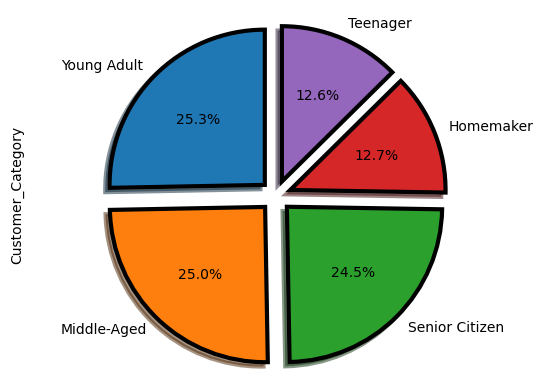

In [209]:
import matplotlib.pyplot as plt
data['Customer_Category'].value_counts().plot(kind='pie', explode=(0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops={"edgecolor":'black',"linewidth":3,"antialiased": True})
plt.axis('equal')
plt.show()

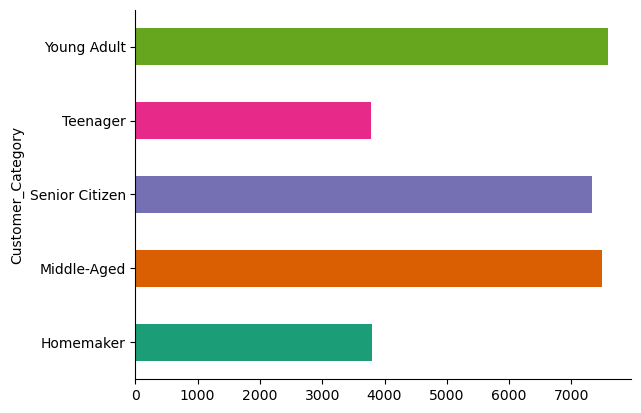

In [210]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Customer_Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

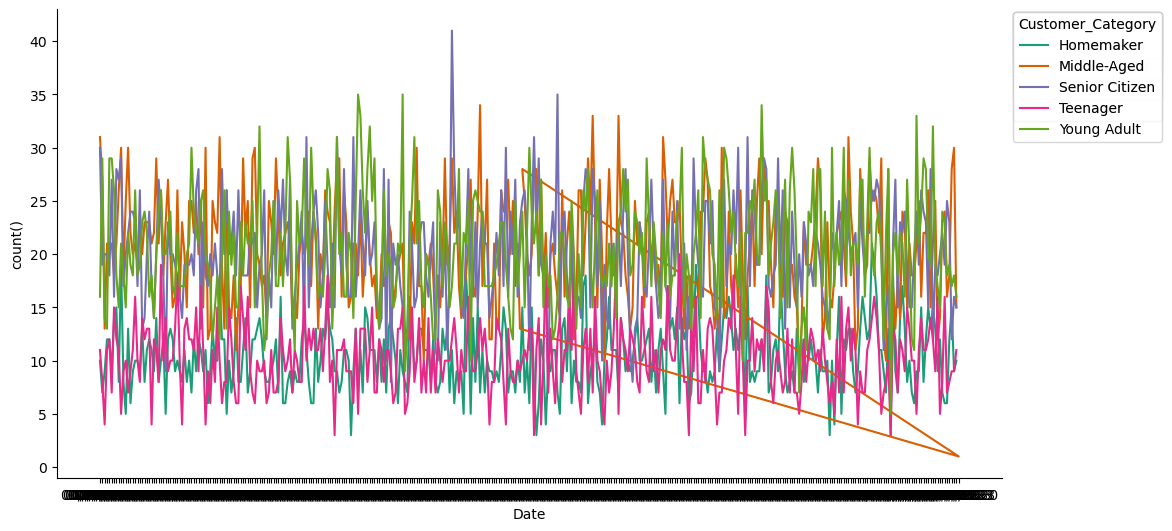

In [211]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Customer_Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Customer_Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

# Convert DataFrame to a list of lists (required format for apyori)

In [212]:
transactions = data['Product'].tolist()

# DISPLAYING THE TRANSACTION

In [213]:
transactions

[["['Body wash'", "'Orange'", "'Laundry Detergent'", "'Kambu Rice'", "'Mop']"],
 ["['Paper Towel For Faces'",
  "'Yogurt'",
  "'Pasta'",
  "'Jam'",
  "'Bread'",
  "'Soda']"],
 ["['Yogurt'", "'Tomatoes'", "'Curd'", "'Juices'", "'Chips']"],
 ["['Black pepper'", "'Cereal Bars']"],
 ["['Black pepper'", "'Cereal'", "'Tomatoes']"],
 ["['Apple'", "'Soap'", "'Spinach']"],
 ["['Baby Wipes'", "'Insect Repellent'", "'Vinegar']"],
 ["['Chocolate'", "'Sugar']"],
 ["['Cereal Bars'", "'Mop'", "'Laundry Detergent'", "'Cereal']"],
 ["['Kambu Rice'", "'Coconut oil'", "'Coffee'", "'Biscuit']"],
 ["['Shampoo'", "'Sugar'", "'Soda'", "'Mustard']"],
 ["['Body wash'", "'Onions'", 'Salt]'],
 ["['Saftey Razor Blade'", "'Ketchup']"],
 ["['Yogurt'", "'Ice Cream'", "'Deodorant']"],
 ["['Shower Gel']"],
 ["['Milk'", "'Cereal']"],
 ["['Hair Gel'", "'Hand Sanitizer'", "'Cereal Bars']"],
 ["['Hand Sanitizer']"],
 ["['Cereal Bars'", "'Chocolate'", "'Tissues'", "'Pickles']"],
 ["['Potatoes'", "'Dishwash scrubber'", "'Ch

# Perform association rule mining using Apriori algorithm

In [214]:
results = list(apriori(transactions, min_support=0.039,min_confidence=0.03))
results

[RelationRecord(items=frozenset({"'Biscuit'"}), support=0.04670402989057913, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Biscuit'"}), confidence=0.04670402989057913, lift=1.0)]),
 RelationRecord(items=frozenset({"'Chips'"}), support=0.039131305044035225, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Chips'"}), confidence=0.039131305044035225, lift=1.0)]),
 RelationRecord(items=frozenset({"'Spices'"}), support=0.03923138510808647, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Spices'"}), confidence=0.03923138510808647, lift=1.0)]),
 RelationRecord(items=frozenset({"'Tongue Cleaner'"}), support=0.04597010942087003, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Tongue Cleaner'"}), confidence=0.04597010942087003, lift=1.0)]),
 RelationRecord(items=frozenset({"'Toothpaste'"}), support=0.045669869228716305, ordered_statistics=[OrderedStatis

# RESULTS

In [215]:
for rule in results:
    print(rule)

RelationRecord(items=frozenset({"'Biscuit'"}), support=0.04670402989057913, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Biscuit'"}), confidence=0.04670402989057913, lift=1.0)])
RelationRecord(items=frozenset({"'Chips'"}), support=0.039131305044035225, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Chips'"}), confidence=0.039131305044035225, lift=1.0)])
RelationRecord(items=frozenset({"'Spices'"}), support=0.03923138510808647, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Spices'"}), confidence=0.03923138510808647, lift=1.0)])
RelationRecord(items=frozenset({"'Tongue Cleaner'"}), support=0.04597010942087003, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Tongue Cleaner'"}), confidence=0.04597010942087003, lift=1.0)])
RelationRecord(items=frozenset({"'Toothpaste'"}), support=0.045669869228716305, ordered_statistics=[OrderedStatistic(items

Displaying the ouput in the order

In [216]:
for Product in results:
    pair = Product[0]
    items = [x for x in pair]
    
    if len(items) >= 2:  # Check for at least two items in the rule
        antecedent = items[0]
        consequent = items[1]
        print("Rule: " + antecedent + " -> " + consequent)
    else:
        antecedent = items[0]
        consequent = None
        print("Rule: " + antecedent)
        
    print("Support: " + str(Product[1]))
    print("Confidence: " + str(Product[2][0][2]))
    
    # Calculate lift if there's a consequent
    if consequent:
        item1_count = sum(1 for transaction in transactions if antecedent in transaction)
        item2_count = sum(1 for transaction in transactions if consequent in transaction)
        rule_count = sum(1 for transaction in transactions if all(item in transaction for item in items))
        
        total_transactions = len(transactions)
        
        # Avoid division by zero
        if total_transactions == 0:
            print("Error: No transactions in the dataset")
            break
        
        item1_support = item1_count / total_transactions
        item2_support = item2_count / total_transactions
        lift = rule_count / (item1_support * item2_support)
        print("Lift: " + str(lift))
    
    print("=====================================")


Rule: 'Biscuit'
Support: 0.04670402989057913
Confidence: 0.04670402989057913
Rule: 'Chips'
Support: 0.039131305044035225
Confidence: 0.039131305044035225
Rule: 'Spices'
Support: 0.03923138510808647
Confidence: 0.03923138510808647
Rule: 'Tongue Cleaner'
Support: 0.04597010942087003
Confidence: 0.04597010942087003
Rule: 'Toothpaste'
Support: 0.045669869228716305
Confidence: 0.045669869228716305


# Minimum SUPPORT with the Minimum CONFIDENT VALUE PRODUCTS

In [217]:
results = list(apriori(transactions, min_support=0.001,min_confidence=0.001))
results

[RelationRecord(items=frozenset({"'Air Freshener'"}), support=0.01401120896717374, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Air Freshener'"}), confidence=0.01401120896717374, lift=1.0)]),
 RelationRecord(items=frozenset({"'Air Freshener']"}), support=0.010008006405124099, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Air Freshener']"}), confidence=0.010008006405124099, lift=1.0)]),
 RelationRecord(items=frozenset({"'Apple'"}), support=0.014311449159327461, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Apple'"}), confidence=0.014311449159327461, lift=1.0)]),
 RelationRecord(items=frozenset({"'Apple']"}), support=0.008907125700560448, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Apple']"}), confidence=0.008907125700560448, lift=1.0)]),
 RelationRecord(items=frozenset({"'Baby Wipes'"}), support=0.01411128903122498, ordered_statistics

In [218]:
for Product in results:
    pair = Product[0]
    items = [x for x in pair]
    
    if len(items) >= 2:  # Check for at least two items in the rule
        print("Rule: " + items[0] + " -> " + items[1])
    else:
        print("Rule: " + items[0])
        
    print("Support: " + str(Product[1]))
    print("Confidence: " + str(Product[2][0][2]))
    
    # Calculate lift
    item1_count = sum(1 for transaction in transactions if items[0] in transaction)
    item2_count = sum(1 for transaction in transactions if len(items) > 1 and items[1] in transaction)
    rule_count = sum(1 for transaction in transactions if all(item in transaction for item in items))
    
    total_transactions = len(transactions)
    
    # Avoid division by zero
    if total_transactions == 0:
        print("Error: No transactions in the dataset")
        break
    
    item1_support = item1_count / total_transactions
    
    if len(items) > 1:
        item2_support = item2_count / total_transactions
        lift = rule_count / (item1_support * item2_support)
        print("Lift: " + str(lift))
    
        
    print("=====================================")


Rule: 'Air Freshener'
Support: 0.01401120896717374
Confidence: 0.01401120896717374
Rule: 'Air Freshener']
Support: 0.010008006405124099
Confidence: 0.010008006405124099
Rule: 'Apple'
Support: 0.014311449159327461
Confidence: 0.014311449159327461
Rule: 'Apple']
Support: 0.008907125700560448
Confidence: 0.008907125700560448
Rule: 'Baby Wipes'
Support: 0.01411128903122498
Confidence: 0.01411128903122498
Rule: 'Baby Wipes']
Support: 0.009540966106218308
Confidence: 0.009540966106218308
Rule: 'Banana'
Support: 0.01501200960768615
Confidence: 0.01501200960768615
Rule: 'Banana']
Support: 0.009274085935414999
Confidence: 0.009274085935414999
Rule: 'Bathing soap']
Support: 0.002468641579930611
Confidence: 0.002468641579930611
Rule: 'Biscuit'
Support: 0.04670402989057913
Confidence: 0.04670402989057913
Rule: 'Biscuit']
Support: 0.022651454496930876
Confidence: 0.022651454496930876
Rule: 'Black pepper'
Support: 0.015045369629036562
Confidence: 0.015045369629036562
Rule: 'Black pepper']
Support: 0